# inputcreator

With this tool you can create HDF5-datasets from the IMAGEN data. 

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import glob
from os.path import join 
import os
import glob

from inputcreator import InputCreator

DATA_DIR = "/ritter/share/data/IMAGEN"

/home/evert/miniconda3/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [5]:
glob.glob(join(DATA_DIR, "IMAGEN_RAW/2.7/FU2/psytools/*ESPAD*.csv"))

['/ritter/share/data/IMAGEN/IMAGEN_RAW/2.7/FU2/psytools/IMAGEN-IMGN_ESPAD_INTERVIEW_FU2-IMAGEN_DIGEST.csv',
 '/ritter/share/data/IMAGEN/IMAGEN_RAW/2.7/FU2/psytools/IMAGEN-IMGN_ESPAD_CHILD_FU2-IMAGEN_DIGEST.csv']

To create a grouping, some things need to be changed: 

1. `tp_scan` is the time point of the scan (BL, FU2 or FU3); 
2. `tp_label` is the time point of the label (BL, FU1, FU2 or FU3); 
3. `qtable` is the questionnaire table containing the label, make sure it corresponds to `tp_label`; 
4. `qtable_pred` is the questionnaire at `tp_scan`. Only necessary when `tp_scan != tp_label`; 
5. `label` is the name of the label in the `qtabel` and should equal a column in said table; 

`DATA_DIR` leads to the location of the IMAGEN data and should not be changed unless the data moves elsewhere on the server. 

In [6]:
params = {
    "DATA_DIR" : DATA_DIR, 
    "tp_scan" : "FU2", 
    "tp_label" : "FU2", 
    "qtable" : "IMAGEN_RAW/2.7/FU2/psytools/IMAGEN-IMGN_ESPAD_CHILD_FU2-IMAGEN_DIGEST.csv", 
    #"qtable_pr" : "IMAGEN_RAW/2.7/BL/psytools/IMAGEN-IMGN_ESPAD_CHILD_RC5-IMAGEN_DIGEST.csv", 
    #"qtable" : "IMAGEN_RAW/2.7/FU3/psytools/IMAGEN-IMGN_AUDIT_FU3.csv",
    "label" : "19a"
}

In [7]:
ic = InputCreator(**params)

/home/evert/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (84,140,158,174,190,191,195,218,220,221,287,298) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<AxesSubplot:>

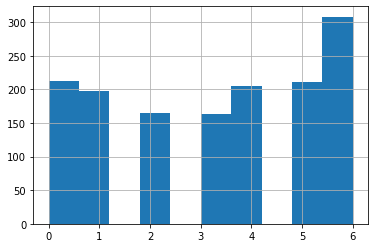

In [8]:
ic.load_tc()
ic.load_psytools()

# With this command you can see the distribution of your chosen label in the data
ic.df.q.hist()

In [9]:
ic.make_label([0,1], [5,6])

In [10]:
#ic.pr_exclude()

In [11]:
ic.df.label.value_counts()

1    519
0    410
Name: label, dtype: int64

# Save data

For my thesis, I want to save the following MRI types: 

1. Freesurfer statistics (fs-stats)
2. T1w images (brain.finalsurfs.mgz, then MNI registered)
3. DTI FA skeleton images

and for these I create one identification (FU2 label, FU2 image) and one prediction (BL label, FU2 image). Within one 

In [12]:
ic.add_wb_path(join(DATA_DIR, "IMAGEN_DTI_BIDS/participants_tbss-dti-FA.csv"), "path_dti-FA")
ic.add_wb_path(join(DATA_DIR, "IMAGEN_prep-brainmask_BIDS/participants.csv"), "path_T1w")

In [14]:
ic.df

,ID,sex,center,center_code,q,label,path_dti-FA,path_T1w
0,000000215284,1,NOTTINGHAM,7,1.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
1,000000240546,0,BERLIN,1,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
2,000000297685,1,NOTTINGHAM,7,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
3,000000308867,0,NOTTINGHAM,7,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
4,000000459848,1,PARIS,8,1.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
...,...,...,...,...,...,...,...,...
784,000099433083,0,MANNHEIM,6,6.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
785,000099514690,1,PARIS,8,0.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
786,000099529479,0,NOTTINGHAM,7,6.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...
787,000099677574,1,BERLIN,1,0.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...


In [15]:
ic.df.label.value_counts()

1    430
0    359
Name: label, dtype: int64

"BERLIN" : 1, 
"DRESDEN" : 2,
"DUBLIN" : 3, 
"HAMBURG" : 4, 
"LONDON" : 5, 
"MANNHEIM" : 6, 
"NOTTINGHAM" : 7, 
"PARIS" : 8

In [16]:
ic._give_save_name()

'FU2-FU2_n789'

In [17]:
ic.df = ic.df.reset_index(drop=True)

In [47]:
ic.save_wb((96, 114, 96), 0.525, "path_T1w", del_zeros=True)

Saving at /ritter/share/data/IMAGEN/h5files/AUDITaudit_freq_lt3_mt5/T1w/T1w_FU3-FU3_n569_z0.525_d0.h5


In [15]:
ic.save_wb((96, 114, 96), 0.525, "path_dti-FA", del_zeros=True)

Saving at /ritter/share/data/IMAGEN/h5files/ESPAD19a_01_56/dti-FA/dti-FA_FU2-FU2_n386_sex0_z0.525_d0.h5


In [15]:
ic.save_fs_stats()

Saving at /ritter/share/data/IMAGEN/h5files/ESPAD19a_01_56/fs-stats/fs-stats_FU2-FU2_n789.h5


In [16]:
ic.df

,ID,sex,center,center_code,q,label,path_dti-FA,path_T1w,rh_bankssts_curvind,rh_caudalanteriorcingulate_curvind,...,lh_rostralanteriorcingulate_curvind,lh_rostralmiddlefrontal_curvind,lh_superiorfrontal_curvind,lh_superiorparietal_curvind,lh_superiortemporal_curvind,lh_supramarginal_curvind,lh_frontalpole_curvind,lh_temporalpole_curvind,lh_transversetemporal_curvind,lh_insula_curvind
0,000000215284,1,NOTTINGHAM,7,1.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,2.2,1.5,...,2.4,16.7,15.6,10.2,7.6,8.2,0.7,2.9,1.1,4.6
1,000000240546,0,BERLIN,1,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.7,4.0,...,3.8,21.2,21.5,12.7,11.4,10.4,2.1,3.2,1.9,7.2
2,000000297685,1,NOTTINGHAM,7,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.5,1.8,...,1.0,17.7,15.4,10.2,6.6,9.5,1.5,2.2,0.7,5.5
3,000000308867,0,NOTTINGHAM,7,5.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.3,1.0,...,3.8,17.8,17.4,13.6,7.7,8.8,1.9,2.5,1.4,6.1
4,000000459848,1,PARIS,8,1.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.3,1.5,...,3.7,22.7,22.2,12.4,9.4,9.8,3.1,3.7,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,000099433083,0,MANNHEIM,6,6.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.6,2.5,...,2.0,19.1,15.7,13.1,8.4,9.6,1.6,2.8,1.0,7.3
785,000099514690,1,PARIS,8,0.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.5,2.0,...,2.0,28.8,20.1,15.6,14.6,12.0,1.6,11.1,1.4,8.4
786,000099529479,0,NOTTINGHAM,7,6.0,1,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,2.0,1.2,...,3.7,28.0,25.5,15.3,8.6,12.4,1.9,2.4,0.9,5.4
787,000099677574,1,BERLIN,1,0.0,0,/ritter/share/data/IMAGEN/IMAGEN_DTI_BIDS/sub-...,/ritter/share/data/IMAGEN/IMAGEN_prep-brainmas...,1.3,1.3,...,3.3,14.0,13.7,10.5,7.1,9.1,0.8,2.1,1.0,3.9
